<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

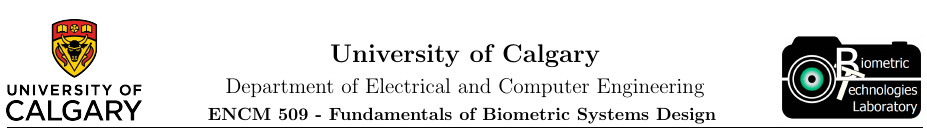

<center>
    <h1>Laboratory Experiment #5</h1>
    <h2>Face Recognition: LBP, PCA and KNN</h2>
    <h4>Linh Nguyen (30019908)</h4>
    <h4>Nafisa Tabassum (10172713)</h4>
    <h4>Pauline Abalos (30011136)</h4>
</center>

## Introduction

The purpose of this lab is to continue the exploration of face recognition and machine learning techniques from Lab 4. The AT&T dataset will still be used. Here, we will go through the steps for pre-processing, feature extraction, training, and finally classification. Similarly to lab 4, we will be using PCA for feature extraction, however we will also apply Local Binary Pattern to compare techniques. We will be training the K-Nearest Neighbors (KNN) classifier, than using it to classify results.

## Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.feature import local_binary_pattern
import scipy.linalg as la

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

from Utils import plot_confusion_matrix

import matplotlib as mpl
# setting the default colormap for images only
mpl.rc('image', cmap='gray')

#### Paramaters

In [2]:
n_subjects = 40

# number of images should sum to 10
n_training_images = 5
n_test_images = 5

knn_neighbors = 3

path = './ATT dataset/'

### Exercise 1

The function ```prediction_evaluation``` was adjusted to include an array called ```accuracies```, where the accuracy of using 50, 100, and 200 components in PCA will be stored. The number of subjects was also changed to 40 instead of 20 people to allow us to observe the PCA at 200 components.

In [3]:
def prediction_evaluation(accuracies, predicted_label, true_label, subject_id=1):
    # accuracy can be calculated as: 
    # predictedRight / (predictedRight + predictedWrong)
    right, wrong = 0, 0
    for predictedLabel, realLabel in zip(predicted_label, true_label):
        if predictedLabel == realLabel:
            right += 1
        else:
            wrong += 1
    acc = right / (right + wrong)
    accuracies.append(acc*100)
    print("Overall Accuracy: %d%%" % (acc * 100))
    
    # True Positive (TP): real label IS subject_id and predicted label IS subject_id
    # False Positive (FP): real label is NOT subject_id while predicted label IS subject_id
    # True Negative (TN): real label is NOT subject_id and predicted label is NOT subject_id
    # False Negative (FN): real label IS subject_id and predicted label is NOT subject_id
    
    TP, FP, TN, FN = 0, 0, 0, 0
    for predictedLabel, realLabel in zip(predicted_label, true_label):
        if predictedLabel == subject_id and realLabel == subject_id:
            TP += 1
        if predictedLabel != subject_id and realLabel == subject_id:
            FN += 1
        if predictedLabel != subject_id and realLabel != subject_id:
            TN += 1
        if predictedLabel == subject_id and realLabel != subject_id:
            FP += 1
    print("Subject #%d:\n\tTP: %d, FP: %d, TN: %d, FN: %d" % (subject_id, TP, FP, TN, FN))
    
    # True Positive Rate (TPR) also known as Sensitivity or Recall
    TPR = TP / (TP + FN)
    # True Negative Rate (TNR) also known as Specificity
    TNR = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)
    # False Negative Rate (FNR)
    FNR = FN / (TP + FN)

    print("\tTPR: %.2f%%, TNR: %.2f%%, FPR: %.2f%%, FNR: %.2f%%" % (TPR*100, TNR*100, FPR*100, FNR*100))

Overall Accuracy: 85%
Subject #1:
	TP: 4, FP: 0, TN: 195, FN: 1
	TPR: 80.00%, TNR: 100.00%, FPR: 0.00%, FNR: 20.00%
Overall Accuracy: 86%
Subject #1:
	TP: 4, FP: 0, TN: 195, FN: 1
	TPR: 80.00%, TNR: 100.00%, FPR: 0.00%, FNR: 20.00%
Overall Accuracy: 86%
Subject #1:
	TP: 4, FP: 0, TN: 195, FN: 1
	TPR: 80.00%, TNR: 100.00%, FPR: 0.00%, FNR: 20.00%


Text(0, 0.5, 'Accuracy (%)')

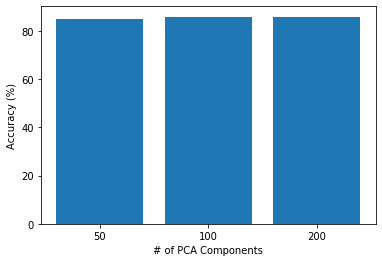

In [4]:
# array to store accuracies for each number of components
accuracies = []

# use the first 5 images from subjectID 1-n_subjects to train the classifier
trainingFaces = []
trainingLabels = []
for subjectId in range(1, n_subjects+1):
    for imageId in range(1, n_training_images+1):
        img = imread("ATT dataset/s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        trainingFaces.append(np.reshape(img, (img.size,)))
        trainingLabels.append(subjectId)

# use the last 5 images from subjectID 1-20 to test the classifier
testingFaces = []
testingLabels = []
for subjectId in range(1, n_subjects+1):
    for imageId in range(n_training_images+1, n_training_images+n_test_images+1):
        img = imread("ATT dataset/s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        testingFaces.append(np.reshape(img, (img.size,)))
        testingLabels.append(subjectId)
        
# Initialize PCA
# Using 50 principal components
pca_50 = PCA(n_components=50)

# fit the model, e.g., creating the covariance matrix... as we manually did in Lab 4
pca_50.fit(trainingFaces);

#Apply PCA to Training and Test set
train_pca_50 = pca_50.transform(trainingFaces)
test_pca_50 = pca_50.transform(testingFaces)

# Initialization and training of KNN 
# n_neighbors: number of neighbors to use
knn_pca_50 = KNeighborsClassifier(n_neighbors=knn_neighbors).fit(train_pca_50, trainingLabels)

# Prediction with testing set
predictedLabels_50 = knn_pca_50.predict(test_pca_50)

# Evaluate predictions then create and plot confusion matrix
prediction_evaluation(accuracies, predictedLabels_50, testingLabels, subject_id=1)

# Repeat procedure, but with 100 principal components
pca_100 = PCA(n_components=100)

pca_100.fit(trainingFaces);

train_pca_100 = pca_100.transform(trainingFaces)
test_pca_100 = pca_100.transform(testingFaces)

knn_pca_100 = KNeighborsClassifier(n_neighbors=knn_neighbors).fit(train_pca_100, trainingLabels)

predictedLabels_100 = knn_pca_100.predict(test_pca_100)

prediction_evaluation(accuracies, predictedLabels_100, testingLabels, subject_id=1)

# Repeat procedure, but with 200 principal components
pca_200 = PCA(n_components=200)

pca_200.fit(trainingFaces);

train_pca_200 = pca_200.transform(trainingFaces)
test_pca_200 = pca_200.transform(testingFaces)

knn_pca_200 = KNeighborsClassifier(n_neighbors=knn_neighbors).fit(train_pca_200, trainingLabels)

predictedLabels_200 = knn_pca_200.predict(test_pca_200)

prediction_evaluation(accuracies, predictedLabels_200, testingLabels, subject_id=1)

plt.bar(['50', '100', '200'], accuracies)
plt.xlabel('# of PCA Components')
plt.ylabel('Accuracy (%)')

From the above bar chart, we can see that the accuracy of the KNN classifier for all three different number of principal components, 50, 100, and 200, was around 86%. This would imply that 50 components is enough for feature extraction of the subjects to get an accuracy of 86%. However, theoretically, this is not correct, as the accuracy should vary more between different number of components.

### Exercise 2

Since there is no need to store accuracies, the function ```prediction_evaluation``` was adjusted again to not include an extra array. For consistency, the number of subjects will remain at 40, however this time we will be using 8 images for training, and 2 images for testing.

In [5]:
def prediction_evaluation(predicted_label, true_label, subject_id=1):
    # accuracy can be calculated as: 
    # predictedRight / (predictedRight + predictedWrong)
    right, wrong = 0, 0
    for predictedLabel, realLabel in zip(predicted_label, true_label):
        if predictedLabel == realLabel:
            right += 1
        else:
            wrong += 1
    acc = right / (right + wrong)
    print("Overall Accuracy: %d%%" % (acc * 100))
    
    # True Positive (TP): real label IS subject_id and predicted label IS subject_id
    # False Positive (FP): real label is NOT subject_id while predicted label IS subject_id
    # True Negative (TN): real label is NOT subject_id and predicted label is NOT subject_id
    # False Negative (FN): real label IS subject_id and predicted label is NOT subject_id
    
    TP, FP, TN, FN = 0, 0, 0, 0
    for predictedLabel, realLabel in zip(predicted_label, true_label):
        if predictedLabel == subject_id and realLabel == subject_id:
            TP += 1
        if predictedLabel != subject_id and realLabel == subject_id:
            FN += 1
        if predictedLabel != subject_id and realLabel != subject_id:
            TN += 1
        if predictedLabel == subject_id and realLabel != subject_id:
            FP += 1
    print("Subject #%d:\n\tTP: %d, FP: %d, TN: %d, FN: %d" % (subject_id, TP, FP, TN, FN))
    
    # True Positive Rate (TPR) also known as Sensitivity or Recall
    TPR = TP / (TP + FN)
    # True Negative Rate (TNR) also known as Specificity
    TNR = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)
    # False Negative Rate (FNR)
    FNR = FN / (TP + FN)

    print("\tTPR: %.2f%%, TNR: %.2f%%, FPR: %.2f%%, FNR: %.2f%%" % (TPR*100, TNR*100, FPR*100, FNR*100))

#### Using LBP

Overall Accuracy: 72%
Subject #1:
	TP: 1, FP: 0, TN: 78, FN: 1
	TPR: 50.00%, TNR: 100.00%, FPR: 0.00%, FNR: 50.00%


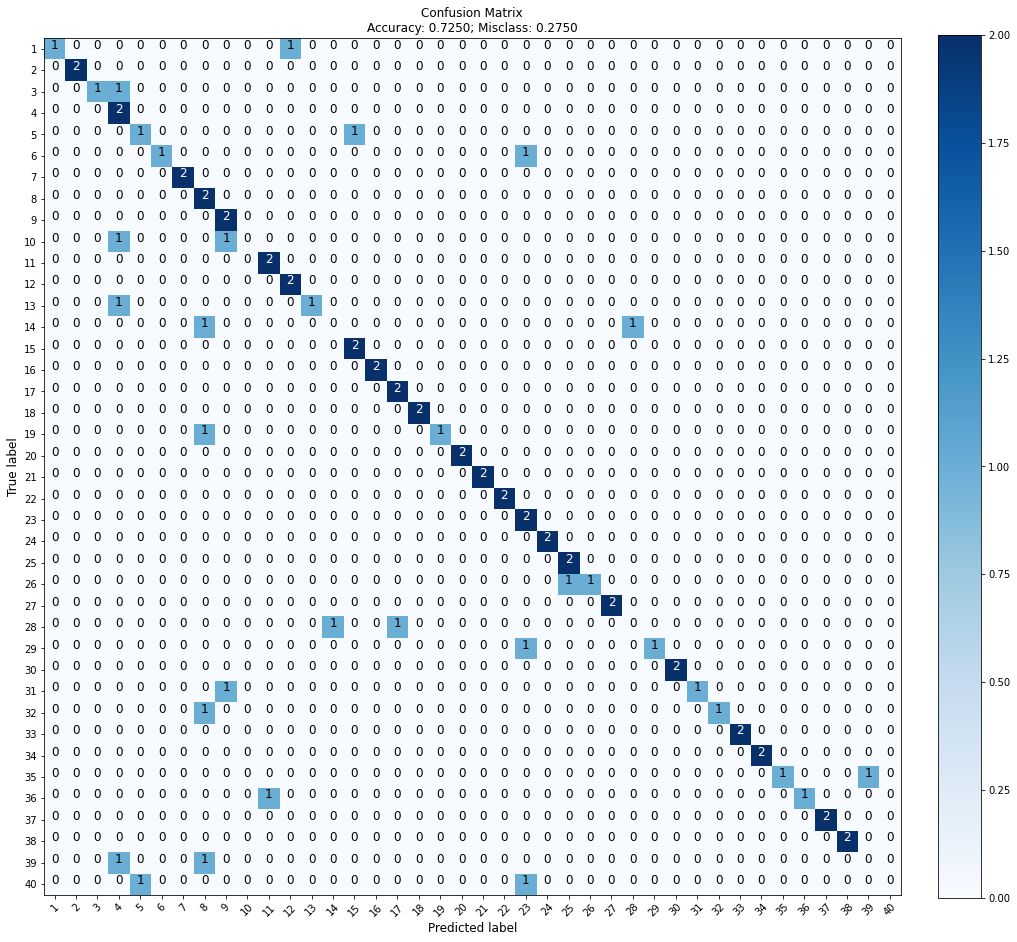

In [6]:
n_training_images = 8
n_test_images = 2

# Prepare Training and Testing sets
# use the first 8 images from subjects 1-n_subjects to train the classifier
trainingFaces = []
trainingLabels = []
for subjectId in range(1, n_subjects+1):
    for imageId in range(1, n_training_images+1):
        img = imread("ATT dataset/s%d/%d.pgm" % (subjectId, imageId), as_gray=True)
        lbp = local_binary_pattern(img, 12, 3)
        trainingFaces.append(np.reshape(lbp, (img.size,)))
        trainingLabels.append(subjectId)
        
# use the last 2 images from subjects 1-n_subjects to test the classifier
testingFaces = []
testingLabels = []
for subjectId in range(1, n_subjects+1):
    for imageId in range(n_training_images+1, n_training_images+n_test_images+1):
        img = imread("ATT dataset/s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        lbp = local_binary_pattern(img, 12, 3)
        testingFaces.append(np.reshape(lbp, (img.size,)))
        testingLabels.append(subjectId)
        
# Initialization and training of KNN 
# n_neighbors: number of neighbors to use
knn = KNeighborsClassifier(n_neighbors=knn_neighbors).fit(trainingFaces, trainingLabels)

# Prediction with testing set
predictedLabels = knn.predict(testingFaces)

# Evaluate predictions then create and plot confusion matrix
prediction_evaluation(predictedLabels, testingLabels, subject_id=1)

confusionMatrix = confusion_matrix(testingLabels, predictedLabels)


plot_confusion_matrix(cm=confusionMatrix,
                      target_names=[i for i in range(1, n_subjects+1)])

#### Using PCA

Overall Accuracy: 93%
Subject #1:
	TP: 2, FP: 0, TN: 78, FN: 0
	TPR: 100.00%, TNR: 100.00%, FPR: 0.00%, FNR: 0.00%


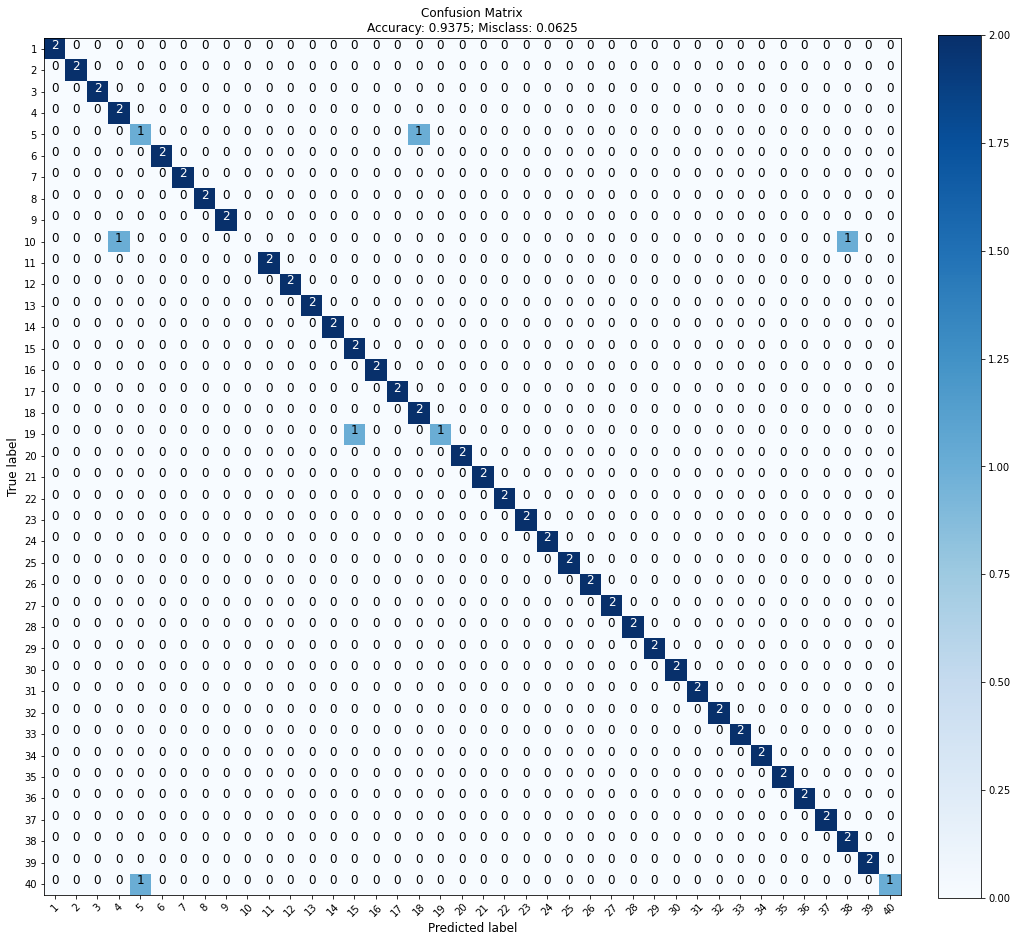

In [7]:
# use the first 8 images from subjectID 1-n_subjects to train the classifier
trainingFaces = []
trainingLabels = []
for subjectId in range(1, n_subjects+1):
    for imageId in range(1, n_training_images+1):
        img = imread("ATT dataset/s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        trainingFaces.append(np.reshape(img, (img.size,)))
        trainingLabels.append(subjectId)

# use the last 2 images from subjectID 1-20 to test the classifier
testingFaces = []
testingLabels = []
for subjectId in range(1, n_subjects+1):
    for imageId in range(n_training_images+1, n_training_images+n_test_images+1):
        img = imread("ATT dataset/s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        testingFaces.append(np.reshape(img, (img.size,)))
        testingLabels.append(subjectId)
        
# Initialize PCA
# n_components: number of principal components
pca = PCA(n_components=100)

# fit the model, e.g., creating the covariance matrix... as we manually did in Lab 4
pca.fit(trainingFaces);

#Apply PCA to Training and Test set
train_pca = pca.transform(trainingFaces)
test_pca = pca.transform(testingFaces)

# Initialization and training of KNN 
# n_neighbors: number of neighbors to use
knn = KNeighborsClassifier(n_neighbors=knn_neighbors).fit(trainingFaces, trainingLabels)

# Prediction with testing set
predictedLabels = knn.predict(testingFaces)

# Evaluate predictions then create and plot confusion matrix
prediction_evaluation(predictedLabels, testingLabels, subject_id=1)

confusionMatrix = confusion_matrix(testingLabels, predictedLabels)

plot_confusion_matrix(cm=confusionMatrix,
                      target_names=[i for i in range(1, n_subjects+1)])

Using KNN as the classifier with Local Binary Pattern for feature extraction, when the training images were increased to 8 and testing images decreased to 2, as opposed to 5 training and testing images each, the overall accuracy decreased to 72%. The true positive rate went decreased to 50%, the true negative rate remained at 100%, the false positive rate remained at 0% and the false negative rate increased 50%. 

As for using KNN as the classifier with Principal Component Analysis for feature extraction, the overall accuracy increase to 92% when using 8 training images and 2 testing images. The true positive rate increased to 100%, the true negative rate remained the same at 100%, the false positive rate remained at 0% and the false negative rate decreased 0%. 

Overall, as the training images were increased, the accuracy went up as the system has more samples to use to train. Comparing LBP and PCA, PCA provides a higher accuracy than when LBP is used for feature extraction, implying that PCA would be a better choice for feature extraction in this case. 

### Exercise 3

Again, the number of subjects used will be 40, and 8 images are used for training while the remaining 2 will be used for testing, as previously defined.

In [8]:
def knn_experiment(knn_neighbours, feature_extractor):
    if feature_extractor == "LBP":
        # Prepare Training and Testing sets
        # use the first 8 images from subjects 1-n_subjects to train the classifier
        trainingFacesLBP = []
        trainingLabelsLBP = []
        for subjectId in range(1, n_subjects+1):
            for imageId in range(1, n_training_images+1):
                img = imread("ATT dataset/s%d/%d.pgm" % (subjectId, imageId), as_gray=True)
                lbp = local_binary_pattern(img, 12, 3)
                trainingFacesLBP.append(np.reshape(lbp, (img.size,)))
                trainingLabelsLBP.append(subjectId)
                
        # use the last 2 images from subjects 1-n_subjects to test the classifier
        testingFacesLBP = []
        testingLabelsLBP = []
        for subjectId in range(1, n_subjects+1):
            for imageId in range(n_training_images+1, n_training_images+n_test_images+1):
                img = imread("ATT dataset/s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
                lbp = local_binary_pattern(img, 12, 3)
                testingFacesLBP.append(np.reshape(lbp, (img.size,)))
                testingLabelsLBP.append(subjectId)

        # Initialization and training of KNN 
        # n_neighbors: number of neighbors to use
        knn_LBP = KNeighborsClassifier(n_neighbors=knn_neighbours).fit(trainingFacesLBP, trainingLabelsLBP)

        # Prediction with testing set
        predictedLabelsLBP = knn_LBP.predict(testingFacesLBP)

        # Evaluate predictions then create and plot confusion matrix
        prediction_evaluation(predictedLabelsLBP, testingLabelsLBP, subject_id=1)

    elif feature_extractor == "PCA":
        # use the first 8 images from subjectID 1-n_subjects to train the classifier
        trainingFacesPCA = []
        trainingLabelsPCA = []
        for subjectId in range(1, n_subjects+1):
            for imageId in range(1, n_training_images+1):
                img = imread("ATT dataset/s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
                trainingFacesPCA.append(np.reshape(img, (img.size,)))
                trainingLabelsPCA.append(subjectId)

        # use the last 2 images from subjectID 1-20 to test the classifier
        testingFacesPCA = []
        testingLabelsPCA = []
        for subjectId in range(1, n_subjects+1):
            for imageId in range(n_training_images+1, n_training_images+n_test_images+1):
                img = imread("ATT dataset/s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
                testingFacesPCA.append(np.reshape(img, (img.size,)))
                testingLabelsPCA.append(subjectId)

        # Initialize PCA
        # n_components: number of principal components
        pca_knn_100 = PCA(n_components=100)

        # fit the model, e.g., creating the covariance matrix... as we manually did in Lab 4
        pca_knn_100.fit(trainingFacesPCA);

        #Apply PCA to Training and Test set
        train_pca_ex = pca_knn_100.transform(trainingFacesPCA)
        test_pca_ex = pca_knn_100.transform(testingFacesPCA)

        # Initialization and training of KNN 
        # n_neighbors: number of neighbors to use
        knn_PCA = KNeighborsClassifier(n_neighbors=knn_neighbours).fit(train_pca_ex, trainingLabelsPCA)

        # Prediction with testing set
        predictedLabelsPCA = knn_PCA.predict(test_pca_ex)

        # Evaluate predictions
        prediction_evaluation(predictedLabelsPCA, testingLabelsPCA, subject_id=1)

print("Experiment 1 with k=5 neighbours and PCA feature extraction:")
knn_experiment(5, "PCA")
print("\n")
print("Experiment 1 with k=5 neighbours and LBP feature extraction:")
knn_experiment(5, "LBP")
print("\n")
print("Experiment 2 with k=11 neighbours and PCA feature extraction:")
knn_experiment(11, "PCA")
print("\n")
print("Experiment 2 with k=11 neighbours and LBP feature extraction:")
knn_experiment(11, "LBP")

Experiment 1 with k=5 neighbours and PCA feature extraction:
Overall Accuracy: 91%
Subject #1:
	TP: 2, FP: 0, TN: 78, FN: 0
	TPR: 100.00%, TNR: 100.00%, FPR: 0.00%, FNR: 0.00%


Experiment 1 with k=5 neighbours and LBP feature extraction:
Overall Accuracy: 71%
Subject #1:
	TP: 1, FP: 0, TN: 78, FN: 1
	TPR: 50.00%, TNR: 100.00%, FPR: 0.00%, FNR: 50.00%


Experiment 2 with k=11 neighbours and PCA feature extraction:
Overall Accuracy: 73%
Subject #1:
	TP: 1, FP: 0, TN: 78, FN: 1
	TPR: 50.00%, TNR: 100.00%, FPR: 0.00%, FNR: 50.00%


Experiment 2 with k=11 neighbours and LBP feature extraction:
Overall Accuracy: 61%
Subject #1:
	TP: 1, FP: 0, TN: 78, FN: 1
	TPR: 50.00%, TNR: 100.00%, FPR: 0.00%, FNR: 50.00%


The results demonstrate that the K value has a significant effect on KNN performance. A lower K value with PCA feature extraction had the largest accuracy with 91%. Using k=11 neighbours also with PCA extraction was the second-most accurate but was similar to the performance of k=5 neighbours with LBP feature extraction. In the case of LBP feature extraction, the accuracy decreased with k=11 neighbours having the worst accuracy. The optimal K value is usually found by the taking the square root of the total number of samples. In this case, since the number of samples is 40, the optimal K value is approximately 7, which could explain why at k=5 the accuracy was higher. The feature extraction algorithm also had an effect on KNN performance. PCA feature extraction peformed better than LBP.

### Bonus Exercise

#### Rank-1 Results

In [9]:
n_subjects = 20

# number of images should sum to 10
n_training_images = 5
n_test_images = 5

trainingFacesPCA = []
trainingLabelsPCA = []
for subjectId in range(1, n_subjects+1):
    for imageId in range(1, n_training_images+1):
        img = imread("ATT dataset/s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        trainingFacesPCA.append(np.reshape(img, (img.size,)))
        trainingLabelsPCA.append(subjectId)

# use the last 2 images from subjectID 1-20 to test the classifier
testingFacesPCA = []
testingLabelsPCA = []
for subjectId in range(1, n_subjects+1):
    for imageId in range(n_training_images+1, n_training_images+n_test_images+1):
        img = imread("ATT dataset/s%d/%d.pgm" %(subjectId, imageId), as_gray=True)
        testingFacesPCA.append(np.reshape(img, (img.size,)))
        testingLabelsPCA.append(subjectId)

# Initialize PCA
# n_components: number of principal components
pca = PCA(n_components=100)

# fit the model, e.g., creating the covariance matrix... as we manually did in Lab 4
pca.fit(trainingFacesPCA);

#Apply PCA to Training and Test set
train_pca = pca.transform(trainingFacesPCA)
test_pca = pca.transform(testingFacesPCA)

# Initialization and training of KNN 
# n_neighbors: number of neighbors to use
knn_PCA = KNeighborsClassifier(n_neighbors=3).fit(train_pca, trainingLabelsPCA)

sampleX = test_pca[0]

# need to reshape: 1 row by N columns
sampleX = sampleX.reshape((1,sampleX.size))

neigh_dist, neigh_ind = knn_PCA.kneighbors(sampleX, n_neighbors=3)
knn_PCA.predict(sampleX)

for x,dist in zip(neigh_ind[0], neigh_dist[0]):
    print('class: %d --> dist: %.2f' % (testingLabels[x], dist))

class: 2 --> dist: 2694.14
class: 13 --> dist: 3784.64
class: 1 --> dist: 4167.68


#### Rank-3 Results

In [10]:
sample = test_pca[0]
sample = sample.reshape((1, sample.size))

neigh_dist, neigh_ind = knn_PCA.kneighbors(sample, n_neighbors=5)

predict_label = knn_PCA.predict(sample)

neighbors = []

for x, dist in zip(neigh_ind[0], neigh_dist[0]):
    neighbors.append((testingLabelsPCA[x], dist))

def rank_k():
    data = np.array(neighbors)
    sortIndices = np.argsort(data[:,1])

    for index, neighbor in enumerate(data[sortIndices,:]):
        print("Rank {}, class {}\n".format(index+1, int(neighbor[0])))
    
print("Predicted label using predict() function: {}\n".format(predict_label))
print("Predicted label using rank_k() function: \n")
rank_k()

Predicted label using predict() function: [1]

Predicted label using rank_k() function: 

Rank 1, class 1

Rank 2, class 5

Rank 3, class 1

Rank 4, class 13

Rank 5, class 1



## Conclusion

In conclusion, the purpose of this lab was to build on the skills learned in the previous lab about facial recognition. Different machine learning techniques were explored such as Local Binary Pattern (LBP) for feature extraction, compared to Principle Component Analysis (PCA) and K-Nearest Neighbors (KNN) as the classifier instead of computing Euclidean distances of the probe image against the gallery ones. Parameters such as the number of components to be used in PCA and the number of k neighbors were tested and the performance of the two feature extraction algorithms were evaluated.